In [51]:
!pip install --upgrade pip
!pip install ipykernel
!pip install seaborn
!pip install pandas


'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [52]:
!pip install numpy==1.26.4 scipy==1.13.0 scikit-learn==1.4.2
!pip install scikit-learn matplotlib

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [53]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib

In [50]:
# Training the Model

main_voc_df = pd.read_csv('final_trainingset.csv')  
X = main_voc_df.drop(columns=['Label'])
y = main_voc_df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

svm_classifier = SVC(
    class_weight='balanced',
    random_state=42
)

model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=None)),
    ('classifier', svm_classifier)
])

param_grid = {
    'classifier__kernel': ['rbf', 'poly'],
    'classifier__C': [0.1, 1, 10, 100, 1000],
    'classifier__gamma': [0.001, 0.01, 0.1, 1, 10],
    'classifier__degree': [2, 3, 4],
    'pca__n_components': [2, 3],
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, n_jobs=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_



In [54]:

joblib.dump(best_model, 'svm_best_model.joblib')
print('Model saved as svm_best_model.joblib.')

Model saved as svm_best_model.joblib.


C:\Users\ben\AppData\Local\Temp\ipykernel_14340\130573307.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


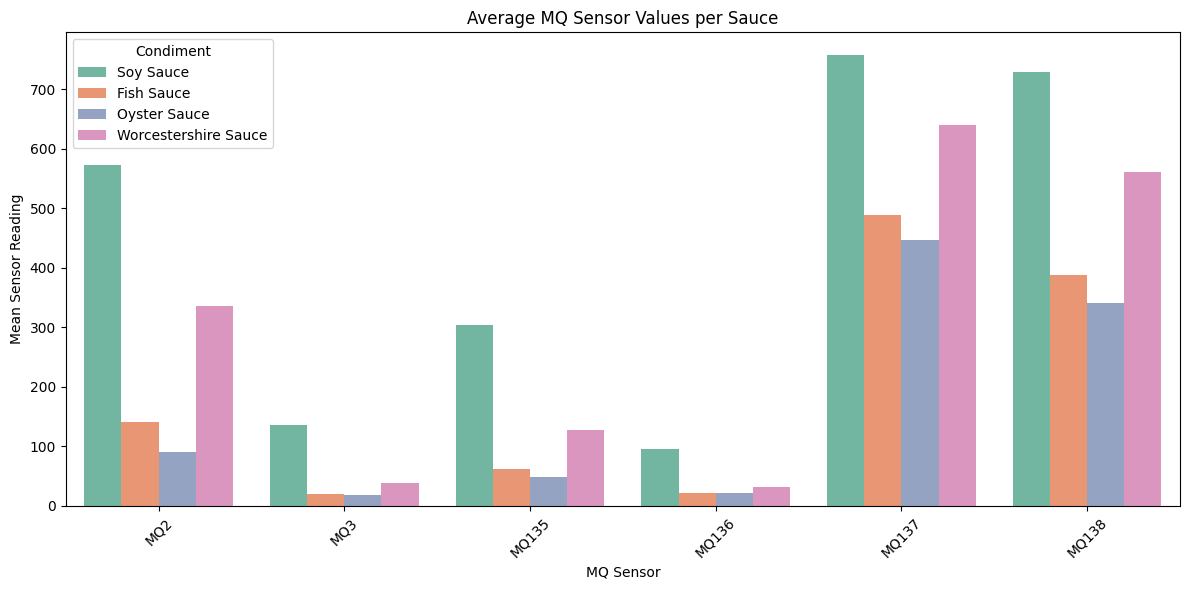

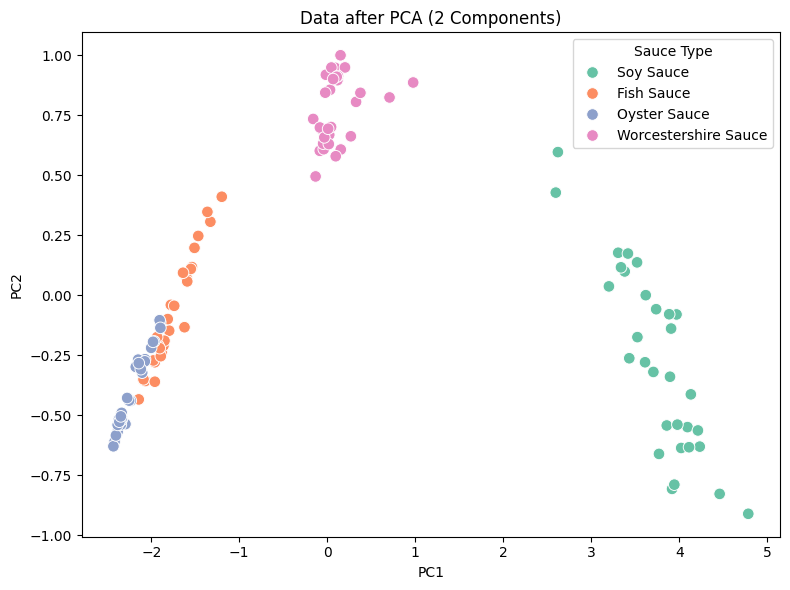

In [55]:
melted_df = main_voc_df.melt(
    id_vars="Label",
    value_vars=[col for col in main_voc_df.columns if "MQ" in col],
    var_name="Sensor",
    value_name="Value"
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=melted_df,
    x="Sensor",
    y="Value",
    hue="Label",
    ci=None,
    palette="Set2"
)

plt.title("Average MQ Sensor Values per Sauce")
plt.ylabel("Mean Sensor Reading")
plt.xlabel("MQ Sensor")
plt.xticks(rotation=45)
plt.legend(title="Condiment")
plt.tight_layout()
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df['Label'] = y.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Label", palette="Set2", s=70)
plt.title("Data after PCA (2 Components)")
plt.legend(title="Sauce Type")
plt.tight_layout()
plt.show()


Best Hyperparameters:


,Hyperparameter,Value
0,classifier__C,0.1
1,classifier__degree,3
2,classifier__gamma,10
3,classifier__kernel,poly
4,pca__n_components,2



Evaluation Metrics (Unseen Data):


,Metric,Value
0,Accuracy,0.9655
1,Macro F1 Score,0.9714



Classification Report:
                      precision    recall  f1-score   support

           Soy Sauce       0.88      1.00      0.93         7
          Fish Sauce       1.00      0.91      0.95        11
        Oyster Sauce       1.00      1.00      1.00         6
Worcestershire Sauce       1.00      1.00      1.00         5

            accuracy                           0.97        29
           macro avg       0.97      0.98      0.97        29
        weighted avg       0.97      0.97      0.97        29



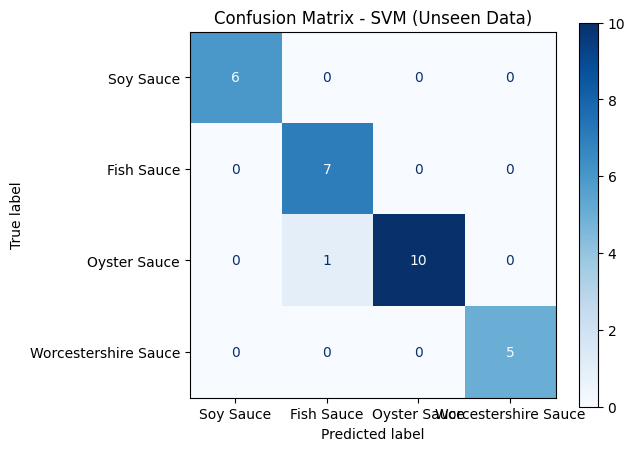


Misclassified Trials:


,True Label,Predicted Label,Correct
22,Oyster Sauce,Fish Sauce,False



All Predictions:


,True Label,Predicted Label,Correct
0,Soy Sauce,Soy Sauce,True
1,Soy Sauce,Soy Sauce,True
2,Soy Sauce,Soy Sauce,True
3,Soy Sauce,Soy Sauce,True
4,Soy Sauce,Soy Sauce,True
5,Soy Sauce,Soy Sauce,True
6,Fish Sauce,Fish Sauce,True
7,Fish Sauce,Fish Sauce,True
8,Fish Sauce,Fish Sauce,True
9,Fish Sauce,Fish Sauce,True


In [56]:
new_df = pd.read_csv('sauce_trials_summary_mean.csv')
X_new = new_df.drop(columns=['Label'])
Y_new = new_df['Label']

predictions = best_model.predict(X_new)

accuracy = accuracy_score(Y_new, predictions)
f1_macro = f1_score(Y_new, predictions, average='macro')

best_params_df = pd.DataFrame(
    list(grid_search.best_params_.items()),
    columns=['Hyperparameter', 'Value']
)
print("\nBest Hyperparameters:")
display(best_params_df)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Macro F1 Score'],
    'Value': [f"{accuracy:.4f}", f"{f1_macro:.4f}"]
})
print("\nEvaluation Metrics (Unseen Data):")
display(metrics_df)

print("\nClassification Report:")
print(classification_report(Y_new, predictions, target_names=Y_new.unique()))

labels = Y_new.unique()  # Preserves label order from CSV
conf_matrix = confusion_matrix(Y_new, predictions, labels=labels)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM (Unseen Data)")
plt.tight_layout()
plt.show()


results_df = pd.DataFrame({
    'True Label': Y_new,
    'Predicted Label': predictions
})
results_df['Correct'] = results_df['True Label'] == results_df['Predicted Label']

misclassified = results_df[~results_df['Correct']]

print("\nMisclassified Trials:")
display(misclassified)

print("\nAll Predictions:")
display(results_df)
#